<a href="https://colab.research.google.com/github/FourLevel/Machine-Learning-and-Financial-Applications/blob/main/Midterm%20Exam/Midterm%20Exam_%E7%8E%8B%E5%A3%AB%E8%AA%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Midterm Exam
## Name: M11218014 王士誠 Finance

---

There are 3 questions in the midterm exam:

1. Besides accuracy, what other criteria should a good regression model meet? How can we measure these criteria? (40 points)

2. What are the limitations of the SARIMAX model, based on your response to Question 1? What have other researchers said about these limitations? (20 points)

3. Using the dataset from Homework 1, tune an MLP model that can compete with your final SARIMAX model from Homework 1. Provide a comparison between both models that is as objective and fair as possible. (40 points)

Note: Please limit your response to one page for each question. An itemized list, along with figures and tables, is encouraged in your writing style.

---

### Question 1.

Besides accuracy, what other criteria should a good regression model meet? How can we measure these criteria?

### Answer 1.

良好的迴歸模型除準確度外，還應衡量以下評估標準：
1. 模型複雜度與泛化能力
	- 衡量工具：
    	1. AIC:
      	\begin{equation}
      	AIC = -2 \space \ln L + 2 \space k
      	\end{equation}
	  	平衡擬合優度與參數數量，懲罰過度參數化

    	2. BIC:
	  	\begin{equation}
      	BIC = -2 \space \ln L + k \space \ln n
      	\end{equation}
	  	n 為樣本量，對複雜模型懲罰更嚴格

		3. 學習曲線：  
		訓練與驗證誤差隨樣本量的變化趨勢

	- 目標：尋找模型複雜度與泛化能力的最佳平衡點

	- 判斷標準：較低的 AIC/BIC 值表示模型較佳；學習曲線需收斂且誤差低

2. 殘差分析
	- 衡量工具：
		1. Ljung-Box 檢定
		\begin{equation}
		Q = n(n + 2) \sum_{k=1}^{h} \frac{\hat{\rho}_k^2}{n - k}
		\end{equation}
		檢驗殘差是否為白噪音，p 值 > 0.05 表示殘差無自相關

		2. ACF 與 PACF圖：檢視殘差自相關性  
		ACF 顯示直接相關性，PACF 顯示條件相關性

	- 目標：殘差應呈隨機分布，不顯示相關性

	- 判斷標準：Ljung-Box 檢定 p 值 > 0.05；ACF/PACF 圖無顯著相關性

3. 穩定性與收斂性
	- 衡量工具：
		1. Loss Curve：追蹤訓練過程中的損失函數變化  
		通常使用MSE、交叉熵等作為損失函數

		2. 梯度變化：評估梯度下降過程的穩定性  
		梯度更新公式：
		\begin{equation}
		\theta_{t+1} = \theta_t - \eta \nabla J(\theta_t)
		\end{equation}
		其中 $\eta$ 為學習率

	- 目標：模型訓練應穩定收斂

	- 判斷標準：損失函數平穩下降並最終穩定；無梯度爆炸或消失現象

4. 計算效率
	- 衡量工具：
		1. 訓練時間：完成模型訓練所需的時間

		2. 預測時間：生成預測所需的時間

		3. 記憶體使用量：訓練和預測過程中的記憶體消耗

	- 目標：在資源限制內完成訓練與預測

	- 判斷標準：合理的計算時間與資源消耗

5. 穩健性
	- 衡量工具：
		1. 交叉驗證：在不同資料子集上評估模型  
		k-fold 交叉驗證：將資料分為 k 份，輪流使用 k-1 份訓練，1 份測試

		2. 敏感度分析：評估輸入資料變化對結果的影響  
		可使用蒙地卡羅模擬或擾動分析

	- 目標：對異常值和噪音具有抵抗力

	- 判斷標準：不同資料子集上性能一致；對輸入小變化不敏感

6. 均方誤差（MSE）與其變體
	- 衡量工具：
		1. MSE（均方誤差）：
		\begin{equation}
		MSE = \frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2
		\end{equation}
		對大誤差給予更高懲罰

		2. RMSE（均方根誤差）:
		\begin{equation}
		RMSE = \sqrt{MSE} = \sqrt{\frac{1}{n}\sum_{i=1}^{n}(y_i - \hat{y}_i)^2}
		\end{equation}
		與原始因變數單位相同，便於解釋

		3. MAE（平均絕對誤差）：
		\begin{equation}
		MAE = \frac{1}{n}\sum_{i=1}^{n}|y_i - \hat{y}_i|
		\end{equation}
		對異常值較不敏感

		4. $R^2$（判定係數）：
		\begin{equation}
		R^2 = 1 - \frac{SS_{residual}}{SS_{total}}
		\end{equation}
		介於 0–1 之間，表示模型解釋的變異比例

	- 目標：量化預測誤差的大小

	- 判斷標準：較低的誤差值表示較佳的預測性能

---

### Question 2.

What are the limitations of the SARIMAX model, based on your response to Question 1? What have other researchers said about these limitations?

### Answer 2.

基於前述評估標準，SARIMAX 模型存在以下主要限制：
1. 模型複雜度與過擬合問題
    - 限制描述：
        1. SARIMAX 模型包含多個參數：
$SARIMAX(p, d, q) \times (P, D, Q)_s + 外生變數$
        
        2. 參數選擇高度依賴 AIC/BIC 等資訊準則
        
        3. 參數空間龐大，難以全面搜索最優組合
    
    - 研究觀點：De Gooijer and Hyndman (2006) 在 *25 years of time series forecasting* 中強調在複雜季節性模式中易導致過度參數化。

2. 線性假設的侷限性
    - 限制描述：
        1. 基於線性關係假設，無法捕捉複雜非線性模式

        2. 在高波動性市場中表現受限
        
        3. 無法處理閾值效應或結構性變化

    - 研究觀點：Teräsvirta, Tjøstheim, and Grangeret al. (2010) 在 *Modelling Nonlinear Economic Time Series* 中指出線性結構無法充分捕捉金融市場動態

3. 計算效率問題
    - 限制描述：
        1. 外生變數增加導致計算複雜度迅速增長
        
        2. 參數估計過程計算密集，特別是使用最大概似估計法
        
        3. 大規模資料集上訓練速度慢
    
    - 研究觀點：Hyndman and Khandakar (2008) 於 *Automatic Time Series Forecasting: The forecast Package for R* 中指出大規模時間序列分析中訓練時間會成為訓練瓶頸

4. 假設穩定性的限制
    - 限制描述：
        1. 假設時間序列基本結構保持穩定
        
        2. 無法適應結構變化或演變的季節性模式
        
        3. 參數固定，無法捕捉時變關係
            
    - 研究觀點：Qiu, Jammalamadaka, and Ning (2018) 在 *Multivariate bayesian structural time series model* 研究指出，當時間序列的基本結構發生變化時，SARIMAX 模型的預測能力會顯著下降，因為它無法適應

---

### Question 3.

Using the dataset from Homework 1, tune an MLP model that can compete with your final SARIMAX model from Homework 1. Provide a comparison between both models that is as objective and fair as possible.

### Answer 3.

### 1. 環境準備

本章節主要完成以下工作：
1. 導入必要的 Python 套件，包含數據處理、機器學習和視覺化工具
2. 設定環境參數，包含警告訊息處理和顯示格式設定
3. 確保程式執行環境的一致性

### 1.1 導入必要套件

In [ ]:
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.neural_network import MLPRegressor
import statsmodels.api as sm
from pickle import dump, load
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest, f_regression
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf
import warnings
import yfinance as yf
import itertools

### 1.2 環境設定

In [ ]:
# 關閉警告訊息
import warnings
warnings.filterwarnings('ignore')

# 圖片使用 svg 輸出，畫質較清晰
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

### 2. 資料蒐集與處理

本章節主要完成以下工作：
1. 從各種來源收集金融市場數據
2. 進行資料清理和特徵工程
3. 建立預測模型所需的特徵集

### 2.1 資料獲取


In [ ]:
# 定義要下載的標的代碼
stk_tickers = ['2330.TW', 'NVDA']  # 股票：台積電、輝達
ccy_tickers = ['DEXCHUS', 'DEXTAUS']  # 匯率：美元/人民幣、美元/台幣
idx_tickers = ['^TWII', '^SOX', '^VIX']  # 指數：台股加權、費城半導體、VIX恐慌

# 下載資料
stk_data = yf.download(stk_tickers, period='max')
idx_data = yf.download(idx_tickers, period='max')
ccy_data = web.DataReader(ccy_tickers, 'fred')

# 計算人民幣/台幣匯率
ccy_data['DEXTACH'] = ccy_data['DEXTAUS'] / ccy_data['DEXCHUS']

# 設定報酬率計算週期
return_period = 5

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  3 of 3 completed


### 2.2 變數準備

In [ ]:
# 準備目標變數 Y（台積電未來報酬率）
Y = np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(return_period).shift(-return_period)
Y.name = 'TSMC_pred'

# 準備 NVDA 股價報酬特徵 (X1)
X1 = np.log(stk_data.loc[:, ('Close', 'NVDA')]).diff(return_period)
X1 = X1.to_frame()
X1.columns = X1.columns.droplevel(level=0)

# 準備匯率報酬特徵 (X2)
X2 = np.log(ccy_data).diff(return_period)
X2 = X2.rename(columns={
    'DEXCHUS': 'USD/RMB',
    'DEXTAUS': 'USD/TWD',
    'DEXTACH': 'RMB/TWD'
})
X2 = X2.drop(columns=['USD/RMB'])

# 準備指數報酬特徵 (X3)
X3 = np.log(idx_data.loc[:, ('Close', ('^TWII', '^SOX', '^VIX'))]).diff(return_period)
X3.columns = X3.columns.droplevel(level=0)
X3 = X3.rename(columns={'^TWII': 'TWII', '^SOX': 'SOX', '^VIX': 'VIX'})

# 準備台積電多期報酬特徵 (X4)
periods = [return_period, return_period*3, return_period*6, return_period*12]
returns = [np.log(stk_data.loc[:, ('Close', '2330.TW')]).diff(i) for i in periods]
X4 = pd.concat(returns, axis=1).dropna()
X4.columns = ['TSMC_DT', 'TSMC_3DT', 'TSMC_6DT', 'TSMC_12DT']

# 合併所有特徵
X = pd.concat([X1, X2, X3, X4], axis=1)

# 建立最終資料集
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
Y = dataset.loc[:, Y.name]
X = dataset.loc[:, X.columns]

### 3. 探索性資料分析（Exploratory Data Analysis, EDA）

本章節主要完成以下工作：
1. 進行基本統計分析
2. 繪製資料分布圖
3. 分析特徵間的相關性

### 3.1 基本統計分析

In [ ]:
# 顯示資料集的描述性統計
pd.set_option('display.precision', 3)
dataset.describe()

,TSMC_pred,NVDA,USD/TWD,RMB/TWD,TWII,SOX,VIX,TSMC_DT,TSMC_3DT,TSMC_6DT,TSMC_12DT
count,158.000,158.000,1.580e+02,1.580e+02,158.000,158.000,1.580e+02,1.580e+02,158.000,158.000,158.000
mean,0.005,0.015,4.887e-05,1.997e-05,0.002,0.004,3.138e-05,4.230e-03,0.015,0.028,0.051
std,0.044,0.065,5.635e-03,5.834e-03,0.026,0.043,1.515e-01,3.984e-02,0.065,0.099,0.137
min,-0.182,-0.146,-2.383e-02,-1.510e-02,-0.111,-0.135,-6.219e-01,-1.469e-01,-0.244,-0.238,-0.286
25%,-0.017,-0.028,-3.435e-03,-3.117e-03,-0.012,-0.024,-8.754e-02,-1.998e-02,-0.021,-0.034,-0.036
50%,0.005,0.014,5.027e-04,-3.355e-05,0.001,0.006,-1.049e-02,8.258e-04,0.009,0.020,0.039
75%,0.030,0.051,3.185e-03,3.260e-03,0.018,0.031,7.446e-02,2.471e-02,0.049,0.077,0.135
max,0.174,0.268,1.710e-02,1.770e-02,0.093,0.153,8.431e-01,1.483e-01,0.228,0.324,0.392


In [ ]:
# 顯示資料集的前幾筆資料
dataset.head()

,TSMC_pred,NVDA,USD/TWD,RMB/TWD,TWII,SOX,VIX,TSMC_DT,TSMC_3DT,TSMC_6DT,TSMC_12DT
2020-04-29,-0.010,0.042,-0.007,-5.928e-03,0.044,0.066,-0.296,0.017,0.048,0.149,-0.081
2020-05-07,-0.015,0.042,0.006,3.168e-03,-0.014,-0.004,-0.083,-0.023,0.038,0.061,-0.109
2020-05-19,0.014,0.121,0.002,-3.072e-04,-0.002,0.029,-0.079,-0.012,-0.017,0.030,-0.090
2020-05-28,0.040,-0.033,0.002,-2.330e-03,-0.006,0.008,-0.032,-0.012,-0.012,0.026,-0.084
2020-06-05,0.014,0.005,-0.008,-9.631e-05,0.048,0.078,-0.115,0.065,0.044,0.058,0.081


### 3.2 單變量分析

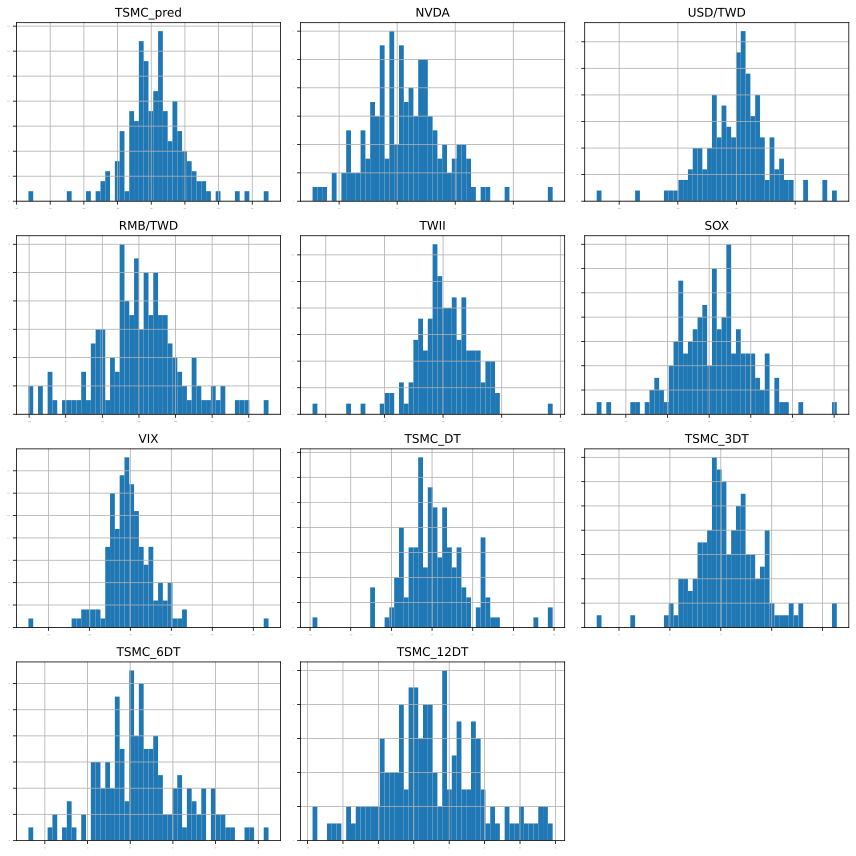

In [ ]:
# 繪製各變數的分佈直方圖
dataset.hist(bins=50,
            sharex=False,
            sharey=False,
            xlabelsize=1,
            ylabelsize=1,
            figsize=(12, 12))
plt.tight_layout()
plt.show()

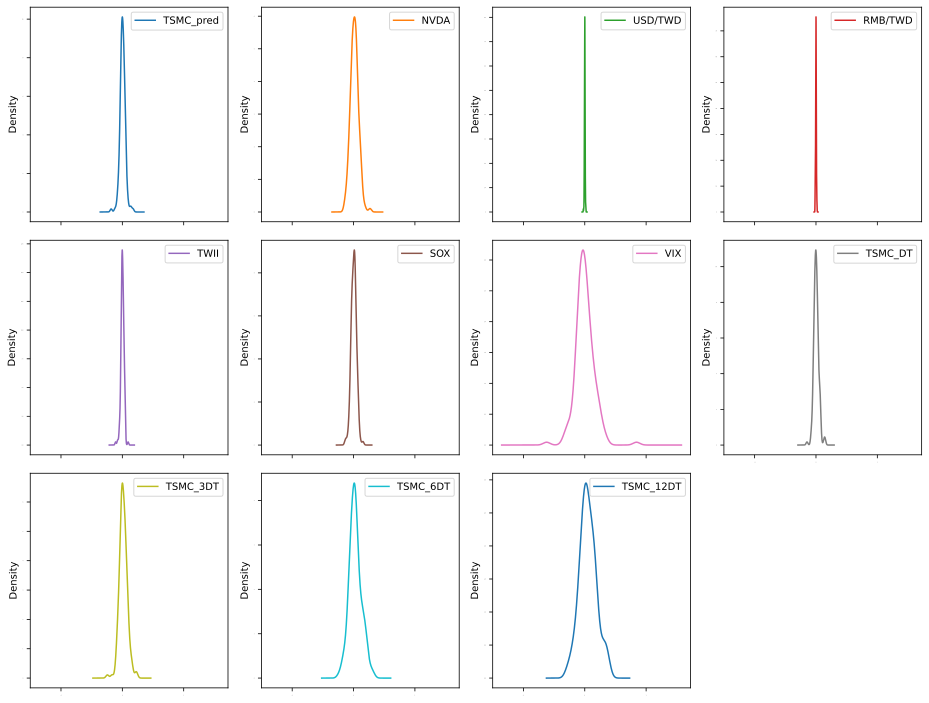

In [ ]:
# 繪製各變數的密度圖
dataset.plot(kind='density',
            subplots=True,
            layout=(4,4),
            sharex=True,
            legend=True,
            fontsize=1,
            figsize=(13, 13))
plt.tight_layout()
plt.show()

### 3.3 相關性分析

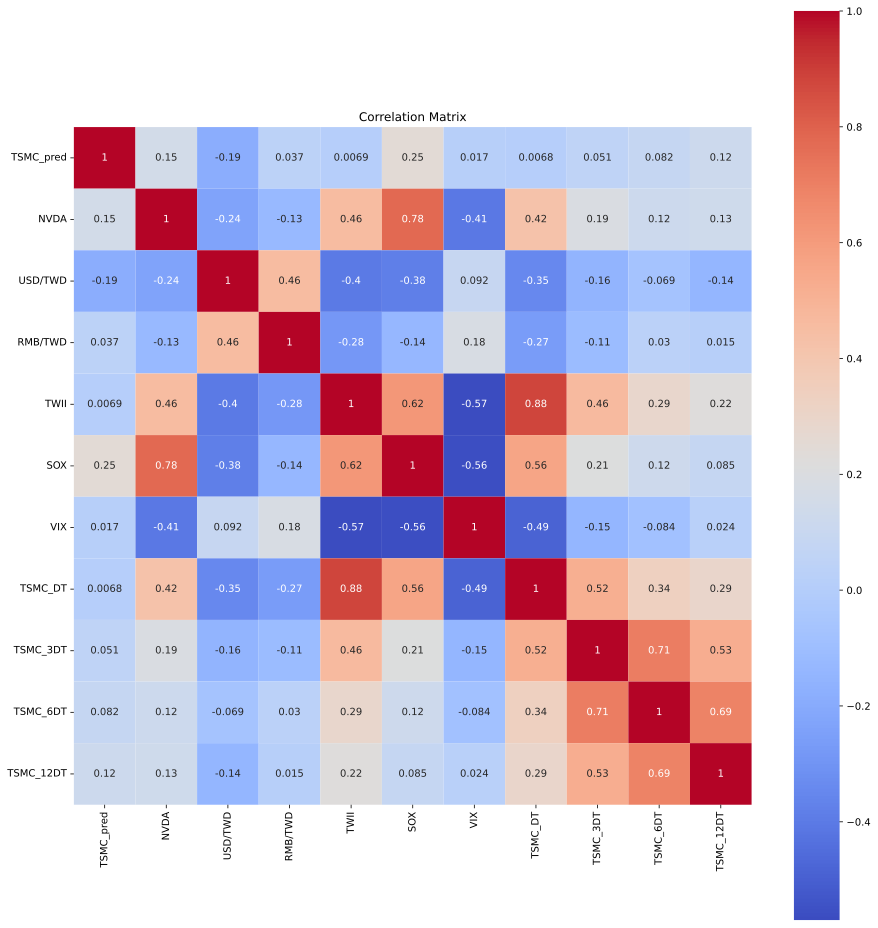

In [ ]:
# 計算並繪製相關係數熱圖
plt.figure(figsize=(13, 13))
correlation = dataset.corr()
sns.heatmap(correlation,
           vmax=1,
           square=True,
           annot=True,
           cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()

In [ ]:
# 繪製變數間的散點矩陣圖
plt.figure(figsize=(15, 15))
axes = scatter_matrix(dataset, figsize=(15, 15))
for ax in axes.flatten():
    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
    ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.tight_layout()
plt.show()

<Figure size 1500x1500 with 0 Axes>

### 3.4 時間序列分析

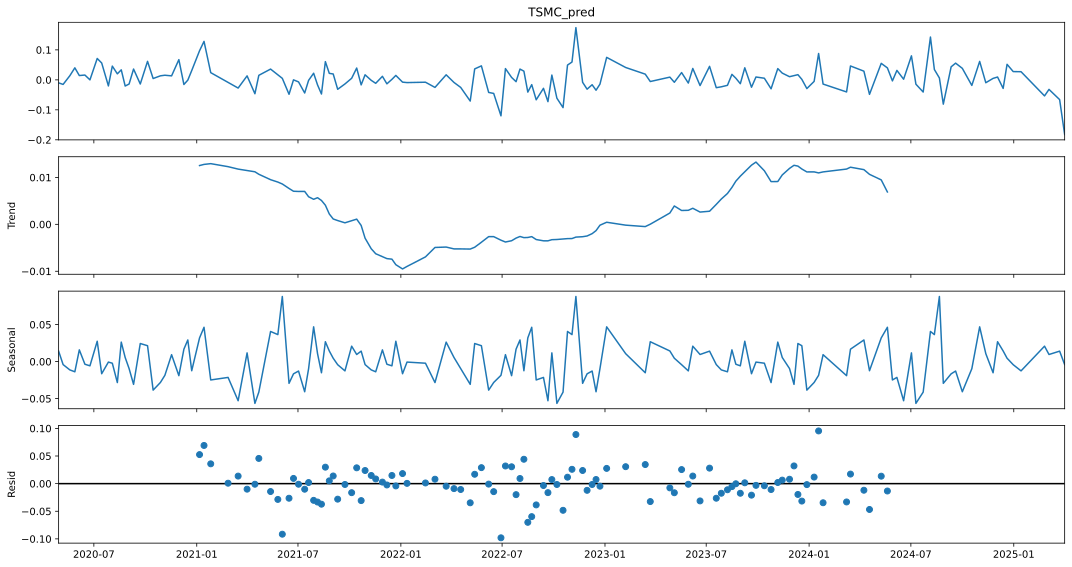

In [ ]:
# 進行時間序列分解
res = sm.tsa.seasonal_decompose(Y, period=52)
fig = res.plot()
fig.set_size_inches(15, 8)
plt.tight_layout()
plt.show()

### 4. 模型建構與訓練

本章節主要完成以下工作：
1. 資料分割與特徵選擇
2. 建立並訓練 MLP 模型
3. 建立並訓練 SARIMAX 模型

### 4.1 資料分割與特徵選擇

In [ ]:
# 使用 f_regression 進行特徵選擇
feature_selector = SelectKBest(score_func=f_regression, k=5)
feature_selector.fit(X, Y)

# 整理特徵重要性分數
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'Score': feature_selector.scores_
})
feature_scores = feature_scores.sort_values('Score', ascending=False)
print("前 10 個最重要的特徵：")
print(feature_scores.head(10))

# 設定分割參數
validation_size = 0.2
train_size = int(len(X) * (1-validation_size))

# 依時間序列特性分割資料
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

前 10 個最重要的特徵：
     Feature   Score
4        SOX  10.300
1    USD/TWD   5.680
0       NVDA   3.740
9  TSMC_12DT   2.289
8   TSMC_6DT   1.055
7   TSMC_3DT   0.409
2    RMB/TWD   0.210
5        VIX   0.043
3       TWII   0.007
6    TSMC_DT   0.007


### 4.2 MLP 模型

In [ ]:
# 初始化結果收集列表
names = []
test_results = []
train_results = []

# 初始化模型列表和評估指標
models = []
models.append(('MLP', MLPRegressor()))

# 設定交叉驗證參數
cv_params = {
    'num_folds': 10,
    'seed': 7,
    'scoring': 'neg_mean_squared_error'
}

# 設定神經網路參數搜尋範圍
mlp_params = {
    'total_neurons': 70,
    'max_layers': 10,
    'min_neurons': 5,
    'step': 5
}

# 生成神經網路結構參數網格，由大到小排列，遵循經驗並且節省運算時間
param_grid = {
    'hidden_layer_sizes': [
        tuple(sorted(combination, reverse=True))
        for num_layers in range(1, mlp_params['max_layers'] + 1)
        for combination in itertools.combinations_with_replacement(
            range(mlp_params['min_neurons'],
                  mlp_params['total_neurons'] + 1,
                  mlp_params['step']),
            num_layers)
        if sum(combination) == mlp_params['total_neurons']
    ]
}

# 執行網格搜尋
grid_search = GridSearchCV(
    estimator=MLPRegressor(),
    param_grid=param_grid,
    cv=KFold(n_splits=cv_params['num_folds'],
             shuffle=True,
             random_state=cv_params['seed']),
    scoring=cv_params['scoring']
)
grid_result = grid_search.fit(X_train, Y_train)

# 輸出最佳參數組合
print(f"最佳參數組合: {grid_result.best_params_}")
print(f"最佳分數: {grid_result.best_score_}")

# 使用最佳參數訓練模型
best_params = grid_result.best_params_
print(f"使用的最佳神經網路結構：{best_params['hidden_layer_sizes']}")
best_mlp = MLPRegressor(hidden_layer_sizes=best_params['hidden_layer_sizes'])
best_mlp.fit(X_train, Y_train)

# 計算 MLP 的訓練和測試誤差
mlp_train_pred = best_mlp.predict(X_train)
mlp_test_pred = best_mlp.predict(X_test)
mlp_train_error = mean_squared_error(Y_train, mlp_train_pred)
mlp_test_error = mean_squared_error(Y_test, mlp_test_pred)

# 將 MLP 結果加入比較列表
names.append("MLP")
train_results.append(mlp_train_error)
test_results.append(mlp_test_error)
print(f"MLP - 訓練誤差: {mlp_train_error:.6f}, 測試誤差: {mlp_test_error:.6f}")


最佳參數組合: {'hidden_layer_sizes': (15, 15, 10, 10, 10, 10)}
最佳分數: -0.0019758153196918157
使用的最佳神經網路結構：(15, 15, 10, 10, 10, 10)
MLP - 訓練誤差: 0.002508, 測試誤差: 0.004219


### 4.3 SARIMAX 模型

In [ ]:
# 準備 SARIMAX 特徵
# SARIMAX 模型不需要將過往股價作為外部變數，因為它的模型結構已經內建了處理目標變數時間相依性的機制
X_train_SARIMAX = X_train.loc[:, ['NVDA', 'USD/TWD', 'RMB/TWD', 'TWII', 'SOX', 'VIX']]
X_test_SARIMAX = X_test.loc[:, ['NVDA', 'USD/TWD', 'RMB/TWD', 'TWII', 'SOX', 'VIX']]
tr_len = len(X_train_SARIMAX)
te_len = len(X_test_SARIMAX)
to_len = len(X)

# 設定 SARIMAX 參數搜尋範圍
sarimax_params = {
    'p': range(0, 3),  # AR 參數
    'd': range(0, 2),  # 差分階數
    'q': range(0, 3),  # MA 參數
    'P': range(0, 2),  # 季節性 AR 參數
    'D': range(0, 2),  # 季節性差分階數
    'Q': range(0, 2),  # 季節性 MA 參數
    's': [12]          # 季節性週期
}

# SARIMAX 模型評估函數
def evaluate_sarimax_model(order, seasonal_order):
    """
    評估單一 SARIMAX 模型配置

    參數:
        order: (p,d,q) 參數組合
        seasonal_order: (P,D,Q,s) 季節性參數組合
    """
    try:
        model = SARIMAX(
            endog=Y_train,
            exog=X_train_SARIMAX,
            order=order,
            seasonal_order=seasonal_order,
            enforce_stationarity=False,
            enforce_invertibility=False
        )
        model_fit = model.fit(disp=False)
        error = mean_squared_error(Y_train, model_fit.fittedvalues)
        return error
    except:
        return float("inf")

# SARIMAX 參數網格搜尋
def evaluate_sarimax_configurations():
    """執行 SARIMAX 模型的參數網格搜尋"""
    best_score = float("inf")
    best_cfg = None
    best_seasonal_cfg = None

    # 生成所有可能的參數組合
    pdq = list(itertools.product(
        sarimax_params['p'],
        sarimax_params['d'],
        sarimax_params['q']
    ))
    seasonal_pdq = list(itertools.product(
        sarimax_params['P'],
        sarimax_params['D'],
        sarimax_params['Q'],
        sarimax_params['s']
    ))

    # 搜尋最佳參數組合
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mse = evaluate_sarimax_model(param, param_seasonal)
                if mse < best_score:
                    best_score = mse
                    best_cfg = param
                    best_seasonal_cfg = param_seasonal
                print(f'SARIMAX{param}x{param_seasonal} - MSE = {mse:.7f}')
            except:
                continue

    print(f'\n最佳模型: SARIMAX{best_cfg}x{best_seasonal_cfg} - MSE = {best_score:.7f}')
    return best_cfg, best_seasonal_cfg, best_score

# 執行參數搜尋
print("開始 SARIMAX 模型參數搜尋...")
best_order, best_seasonal_order, best_score = evaluate_sarimax_configurations()

# 使用最佳參數訓練 SARIMAX 模型
model_SARIMAX = SARIMAX(
    endog=Y_train,
    exog=X_train_SARIMAX,
    order=best_order,
    seasonal_order=best_seasonal_order
)
model_SARIMAX_fit = model_SARIMAX.fit(disp=False)

# 計算 SARIMAX 的訓練和測試誤差
sarimax_train_error = mean_squared_error(Y_train, model_SARIMAX_fit.fittedvalues)
sarimax_predictions = model_SARIMAX_fit.predict(
    start=tr_len - 1,
    end=to_len - 1,
    exog=X_test_SARIMAX
)[1:]
sarimax_test_error = mean_squared_error(Y_test, sarimax_predictions)

# 將 SARIMAX 結果加入比較列表
names.append("SARIMAX")
train_results.append(sarimax_train_error)
test_results.append(sarimax_test_error)
print(f"SARIMAX - 訓練誤差: {sarimax_train_error:.6f}, 測試誤差: {sarimax_test_error:.6f}")


開始 SARIMAX 模型參數搜尋...
SARIMAX(0, 0, 0)x(0, 0, 0, 12) - MSE = 0.0013190
SARIMAX(0, 0, 0)x(0, 0, 1, 12) - MSE = 0.0013208
SARIMAX(0, 0, 0)x(0, 1, 0, 12) - MSE = 0.0022761
SARIMAX(0, 0, 0)x(0, 1, 1, 12) - MSE = 0.0015903
SARIMAX(0, 0, 0)x(1, 0, 0, 12) - MSE = 0.0013106
SARIMAX(0, 0, 0)x(1, 0, 1, 12) - MSE = 0.0013031
SARIMAX(0, 0, 0)x(1, 1, 0, 12) - MSE = 0.0016891
SARIMAX(0, 0, 0)x(1, 1, 1, 12) - MSE = 0.0016065
SARIMAX(0, 0, 1)x(0, 0, 0, 12) - MSE = 0.0012876
SARIMAX(0, 0, 1)x(0, 0, 1, 12) - MSE = 0.0013025
SARIMAX(0, 0, 1)x(0, 1, 0, 12) - MSE = 0.0022499
SARIMAX(0, 0, 1)x(0, 1, 1, 12) - MSE = 0.0016123
SARIMAX(0, 0, 1)x(1, 0, 0, 12) - MSE = 0.0012922
SARIMAX(0, 0, 1)x(1, 0, 1, 12) - MSE = 0.0012834
SARIMAX(0, 0, 1)x(1, 1, 0, 12) - MSE = 0.0016702
SARIMAX(0, 0, 1)x(1, 1, 1, 12) - MSE = 0.0016061
SARIMAX(0, 0, 2)x(0, 0, 0, 12) - MSE = 0.0012865
SARIMAX(0, 0, 2)x(0, 0, 1, 12) - MSE = 0.0012878
SARIMAX(0, 0, 2)x(0, 1, 0, 12) - MSE = 0.0022488
SARIMAX(0, 0, 2)x(0, 1, 1, 12) - MSE = 0.0016627

### 5. 模型評估與比較

本章節主要完成以下工作：
1. 計算並比較各模型的預測誤差
2. 視覺化預測結果

### 5.1 模型性能比較

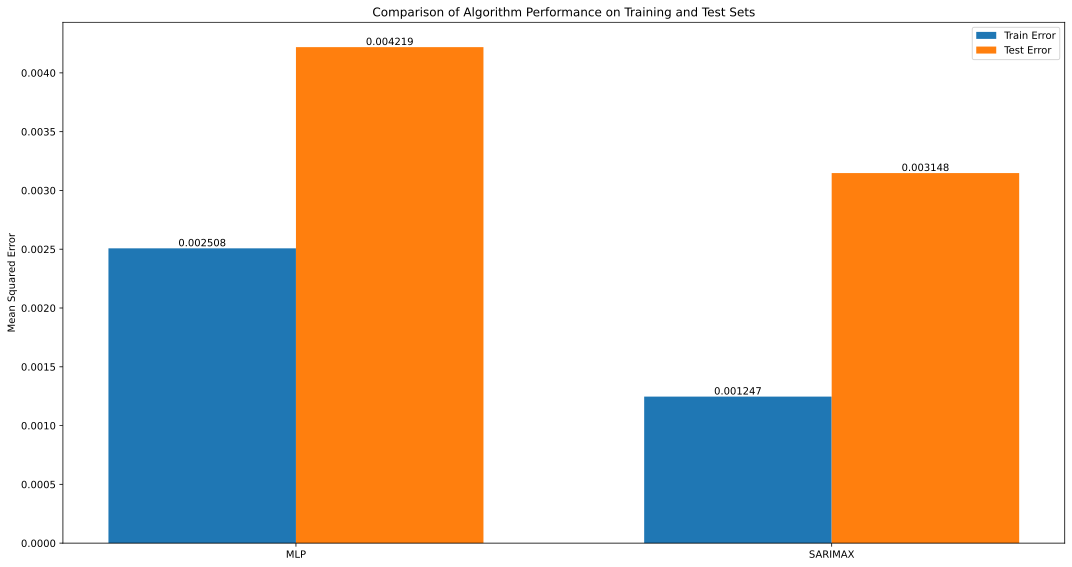

In [ ]:
# 繪製模型比較長條圖
plt.figure(figsize=(15, 8))
plt.title('Comparison of Algorithm Performance on Training and Test Sets')

# 設定長條圖參數
x = np.arange(len(names))
width = 0.35

# 繪製長條圖
plt.bar(x - width/2, train_results, width, label='Train Error')
plt.bar(x + width/2, test_results, width, label='Test Error')

# 設定圖形細節
plt.xticks(x, names)
plt.ylabel('Mean Squared Error')
plt.legend()

# 在長條上標示具體數值
for i, v in enumerate(train_results):
    plt.text(i - width/2, v, f'{v:.6f}', ha='center', va='bottom')
for i, v in enumerate(test_results):
    plt.text(i + width/2, v, f'{v:.6f}', ha='center', va='bottom')

plt.tight_layout()
plt.show()

### 5.2 預測結果視覺化

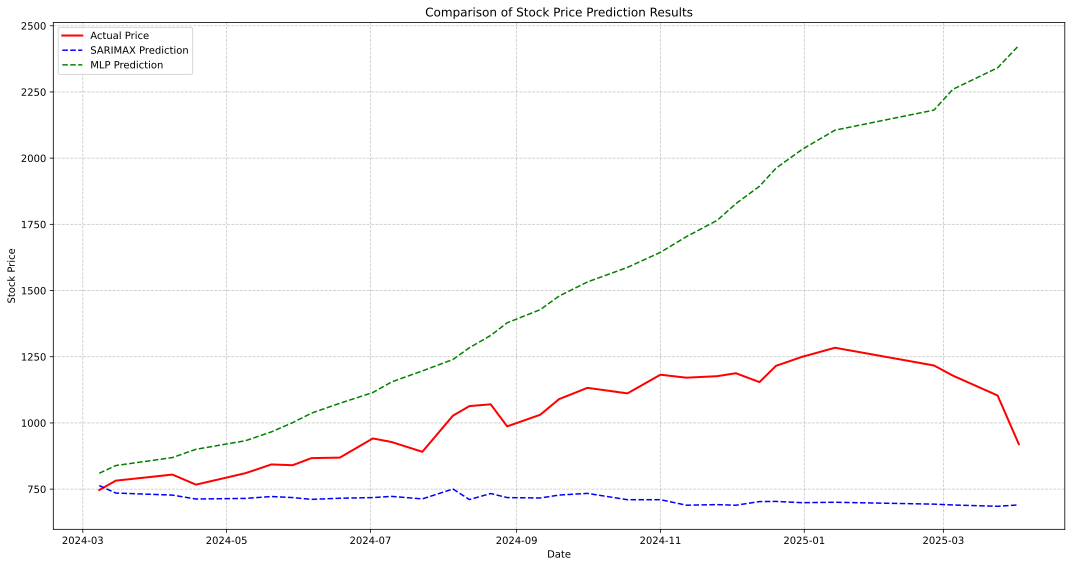

In [ ]:
# 獲取初始價格
initial_price = stk_data.loc[Y_test.index[0], ('Close', '2330.TW')]

# 計算實際價格
actual_prices = initial_price * np.exp(Y_test).cumprod()

# 計算 SARIMAX 預測價格
sarimax_predictions.index = Y_test.index
predicted_prices_sarimax = initial_price * np.exp(sarimax_predictions).cumprod()

# 計算 MLP 預測價格
mlp_predictions = best_mlp.predict(X_test)
mlp_predictions = pd.Series(mlp_predictions, index=Y_test.index)
predicted_prices_mlp = initial_price * np.exp(mlp_predictions).cumprod()

# 繪製所有結果在同一張圖上
plt.figure(figsize=(15, 8))
plt.plot(actual_prices, 'r', label='Actual Price', linewidth=2)
plt.plot(predicted_prices_sarimax, 'b--', label='SARIMAX Prediction', linewidth=1.5)
plt.plot(predicted_prices_mlp, 'g--', label='MLP Prediction', linewidth=1.5)
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Comparison of Stock Price Prediction Results')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

### 6. 結果討論

由以上 MSE 計算比較圖與股價預測圖，可看出在股價預測部分

- SARIMAX 模型：
    1. 訓練誤差：0.001247
    2. 測試誤差：0.003148
    3. 訓練與測試誤差差距：0.001901 (約2.52倍)

- MLP 模型：
    1. 訓練誤差：0.002508
    2. 測試誤差：0.004219
    3. 訓練與測試誤差差距：0.001711 (約1.68倍)

- 訓練集表現：SARIMAX 在訓練集上表現明顯優於 MLP，誤差僅為 MLP 的約 50%。

- 測試集表現：在測試集上，SARIMAX 同樣優於 MLP，誤差約為 MLP 的 75%。

- 泛化能力：SARIMAX 模型測試誤差是訓練誤差的 2.52 倍，顯示出一定程度的過擬合現象。

- 結果解讀：
    1. SARIMAX 擅長捕捉時間序列的線性模式和自相關性
    2. MLP 擅長處理複雜的非線性關係，但需要適當的特徵工程來處理時間相依性